In [1]:
#Importing the Library,
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the data

In [2]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.



In [4]:
df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [5]:
df.head()# after renaming the columns name of the data set .

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.shape

(1503, 6)

In [7]:
df.isnull().sum()# there is no null value in the given data set .

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
### first Do train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [10]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


In [11]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


<AxesSubplot: >

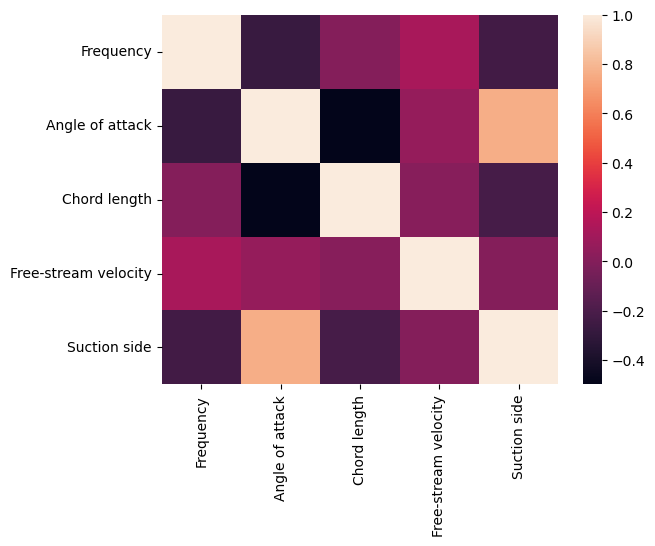

In [12]:
sns.heatmap(X_train.corr())

<AxesSubplot: >

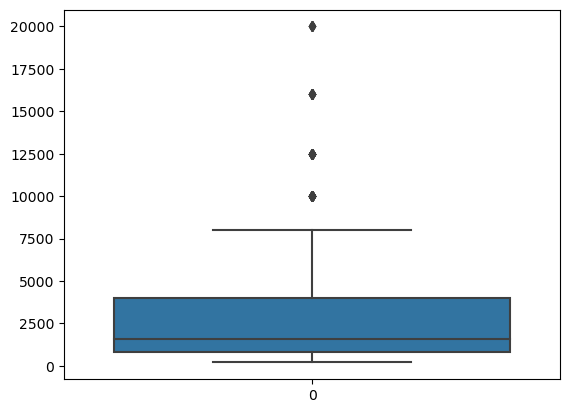

In [13]:
sns.boxplot(X_train['Frequency'])#checking outlier is ther or not the frequency columns 


<AxesSubplot: >

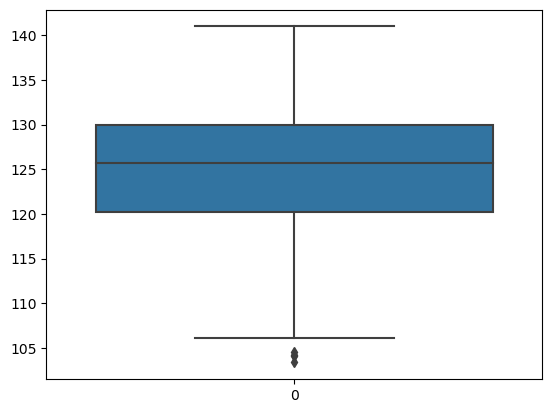

In [14]:
sns.boxplot(df['pressure level'])

<AxesSubplot: ylabel='Frequency'>

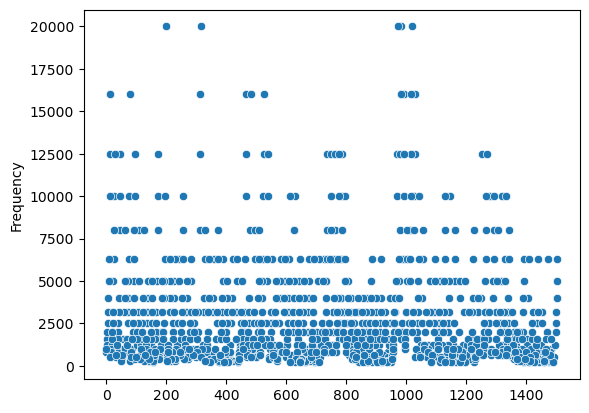

In [15]:
sns.scatterplot(X_train['Frequency'])

In [16]:
len(df['pressure level'].unique())# so it is regression probelm ,
# it it haing 20-30 class we may condiser it as classification


1456

In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linear = LinearRegression()
dt = DecisionTreeRegressor()
svr = svm.SVR()
rf = RandomForestRegressor()

In [18]:
linear.fit(X_train, y_train)

LinearRegression()

In [19]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
svr.fit(X_train, y_train)

SVR()

In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
y_pred_linear = linear.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svr = svr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [23]:
import math
error_linear = math.sqrt(mean_squared_error((y_pred_linear), y_test))  
error_dt = math.sqrt(mean_squared_error(y_pred_dt, y_test))
error_svr = math.sqrt(mean_squared_error(y_pred_svr, y_test))  
error_rf = math.sqrt(mean_squared_error(y_pred_rf, y_test))

In [24]:
print ("    Model           :     RMSE Error\n" )
print ("Linear Regression   : ", error_linear)
print ("Decision Tree       : ", error_dt)
print ("Support Vector      : ", error_svr)
print ("Random Forest       : ", error_rf)

    Model           :     RMSE Error

Linear Regression   :  4.791103164735044
Decision Tree       :  2.701622739654697
Support Vector      :  6.449533008454223
Random Forest       :  1.8453543206323273


In [25]:
print(linear.score(X_test, y_test))

0.5124474986138421


In [26]:

print(dt.score(X_test, y_test))

0.8449757102483019


In [27]:
print(svr.score(X_test, y_test))

0.11649932904323934


In [28]:
print(rf.score(X_test, y_test))

0.9276714304525828


In [32]:
X_test.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
51,400,0.0,0.3048,31.7,0.003313
1465,1250,12.3,0.1016,31.7,0.041876
184,2500,4.0,0.3048,39.6,0.005796
1000,4000,0.0,0.0254,31.7,0.000439
746,5000,0.0,0.0508,55.5,0.000762


In [29]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))

In [30]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([123.93344, 119.24248, 119.32783, 136.04597, 134.14726, 123.85397,
       123.69032, 134.05911, 134.30073, 127.73657, 126.34537, 112.81913,
       132.65633, 132.22904, 124.88039, 107.92003, 129.92148, 129.89869,
       128.33883, 125.19384, 125.09345, 127.4306 , 110.90875, 125.71978,
       124.46795, 126.31872, 129.68955, 131.35726, 109.3043 , 130.91932,
       131.67421, 121.96261, 128.1047 , 119.20944, 119.31411, 133.17515,
       133.66469, 129.7353 , 121.16746, 111.85639, 125.91696, 134.70873,
       127.46649, 121.72423, 126.59644, 134.2861 , 129.59835, 118.45856,
       121.36368, 133.39585, 132.16162, 114.63171, 129.2498 , 127.08205,
       126.5975 , 121.10097, 123.61185, 129.86995, 122.31766, 118.60804,
       125.79454, 134.34058, 130.51899, 133.35401, 117.68899, 125.02011,
       122.76102, 119.48966, 126.11913, 129.47431, 129.06064, 129.78051,
       128.74582, 116.88486, 129.38563, 128.18134, 129.54596, 132.58521,
       134.51944, 135.80372, 124.62893, 119.98008, 

In [33]:
dict_test={
    "Frequency":9,
    "Angle of attack":8,
    "Chord length":10,
    "Free-stream velocity":1,
    "Suction side":7
}

In [34]:
dict_test

{'Frequency': 9,
 'Angle of attack': 8,
 'Chord length': 10,
 'Free-stream velocity': 1,
 'Suction side': 7}

In [38]:
[list(dict_test.values())]

[[9, 8, 10, 1, 7]]

In [40]:
 pickled_model.predict([list(dict_test.values())])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([118.12068])

In [41]:
dict_test.values()

dict_values([9, 8, 10, 1, 7])